In [15]:
'''
Analyzing ferrous Ammonia Sulphate for isomer shift.
'''

import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.optimize import curve_fit
import spinmob as s

In [16]:
'''
giving a fitter, returns an array of the fitted lorentzian1 parameters and errors in 2D array
arg: my_fitter = fit, x = integer value offset

'''
def getFits_lor(my_fitter, x):
    
    di = my_fitter.get_fit_results()
    results = [di[key] for key in di.keys()]
    
    E0 = [results[0+6*x], results[1+6*x]]
    gamma = [results[2+3*x], results[3+6*x]]
    A = [results[4+3*x], results[+6*x]]
    B = [results[6+3*x], results[7+6*x]]
    
    return [E0, gamma, A, B]

"""
Takes array of channels, and m, b of linear function
Returns array of velocities [mmsec]
"""
def chan_to_velo(channels, m, b):
    v = [m[0]*c + b[0] for c in channels]
#     vE = 
    
    return v

"""
"""
def average(a, b, offset):
    
    center = (a[0] - b[0]) / 2.0 + offset[0]
    err = np.sqrt((np.sqrt((a[1])**2 + (b[1])**2)*0.5)**2+(offset[1])**2)
    
    return [center, err]
    

#one lorentzians with offset
def lorentzian(E, E0, gamma, A, b):
    denom = (E-E0)**2 + (gamma/2)**2
    return A*gamma**2/denom + b

#2 lorentzians added together with one offset
def lorentzian2(E, E0, gamma, A, E0_2, gamma_2, A_2, b):
    denom = (E-E0)**2 + (gamma/2)**2
    denom_2 = (E-E0_2)**2 + (gamma_2/2)**2

    return A*gamma**2/denom + A_2*gamma_2**2/denom_2 + b

#6 lorentzians added together with one offset
def lorentzian6(E, E0, gamma, A, E0_2, gamma_2, A_2, E0_3, gamma_3, A_3, E0_4, gamma_4, A_4, E0_5, gamma_5, A_5, E0_6, gamma_6, A_6, b):
    denom = (E-E0)**2 + (gamma/2)**2
    denom_2 = (E-E0_2)**2 + (gamma_2/2)**2
    denom_3 = (E-E0_3)**2 + (gamma_3/2)**2
    denom_4 = (E-E0_4)**2 + (gamma_4/2)**2
    denom_5 = (E-E0_5)**2 + (gamma_5/2)**2
    denom_6 = (E-E0_6)**2 + (gamma_6/2)**2

    return A*gamma**2/denom + A_2*gamma_2**2/denom_2 + A_3*gamma_3**2/denom_3 + A_4*gamma_4**2/denom_4 + A_5*gamma_5**2/denom_5 + A_6*gamma_6**2/denom_6 + b

#2 lorentzians added together with one offset
def lorentzian2Const(E, center, dist, gamma, I, b):
    denom = (E- (center - dist) )**2 + (gamma/2)**2
    denom_2 = (E- (center + dist) )**2 + (gamma/2)**2

    return I*gamma**2/denom + I*gamma**2/denom_2 + b


In [17]:
# channel to velocity relation from calibration data
b = [11.000776381475806, 0.0011164921537570854] 
m = [-0.08527733629051013, 8.194955387410484e-06]

## Isomer shift
ferrous Ammonia Sulphate


In [5]:
#loading ferrous Ammonia Sulphate data
data = np.loadtxt(".//data//ferrousAmmoniaSulphate_Jan17_full.Asc", skiprows=0)

data = np.transpose(data)
data[1][511] = (data[1][510] + data[1][0])/2
ydataerr = np.sqrt(data[1])

dataL = [data[0][0:256], data[1][0:256], ydataerr[0:256]]

In [6]:
# lorentzian2 - for fitting 2 - test with channels still
# my_fitter = s.data.fitter()
# my_fitter.set(style_data = [{'marker': '.', 'color': 'black', 'ls': '', 'mec': 'b'}]\
#               , plot_guess=False, fpoints=None, xlabel = "Channels" , ylabel = "Counts")
# # help(s.data.fitter)

# my_fitter.set_functions(f=lorentzian2, p='E0=130,gamma=5,A=-2300,E0_2=382,gamma_2=5,A_2=-2300,b=58000')
# my_fitter.set_data(xdata=data[0], ydata=data[1], eydata=ydataerr)
# my_fitter.fit()
# my_fitter.print_fit_parameters()


In [17]:
# # fitLS, fitRS - checking center of SS

# center = (fitRS[0][0] - fitLS[0][0]) / 2.0 + fitLS[0][0]
# print(center)
# 512/2

# output:

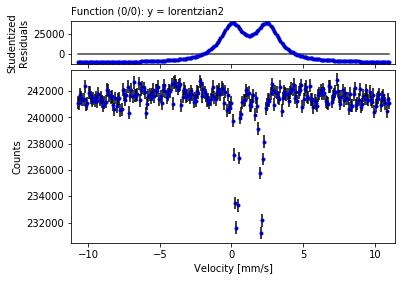

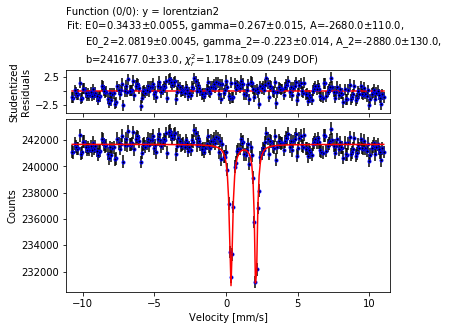

{'E0': 0.3432994230195045, 'E0.std': 0.00554269024721848, 'gamma': 0.26747701652114575, 'gamma.std': 0.015410996303687733, 'A': -2676.503262545556, 'A.std': 106.84197679515897, 'E0_2': 2.081890698029444, 'E0_2.std': 0.004450143117585573, 'gamma_2': -0.2230795488491644, 'gamma_2.std': 0.014228974198251065, 'A_2': -2880.9435616774063, 'A_2.std': 125.0492069078468, 'b': 241677.32122026815, 'b.std': 32.90302012321386, 'covariance': array([[ 3.07214152e-05, -5.40362579e-07, -3.09053197e-03,
         3.62986845e-08,  6.49290007e-07, -2.16862035e-03,
        -5.76187880e-04],
       [-5.40362579e-07,  2.37498807e-04,  1.11762520e+00,
         5.51488337e-07,  4.96500069e-06, -2.57133572e-02,
         9.21155235e-02],
       [-3.09053197e-03,  1.11762520e+00,  1.14152080e+04,
         1.32646802e-03,  2.10387956e-02,  4.61790435e+00,
        -5.33150480e+01],
       [ 3.62986845e-08,  5.51488337e-07,  1.32646802e-03,
         1.98037738e-05,  3.95379723e-06, -3.12180910e-02,
        -1.0151838

In [18]:
#LHS of ferrous Ammonia Sulphate
velocities = chan_to_velo(dataL[0], m, b)

my_fitter = s.data.fitter()
my_fitter.set(style_data = [{'marker': '.', 'color': 'black', 'ls': '', 'mec': 'b'}]\
              , plot_guess=False, fpoints=None, xlabel = "Velocity [mm/s]" , ylabel = "Counts")
# help(s.data.fitter)

my_fitter.set_functions(f=lorentzian2, p='E0=0,gamma=2,A=-5.3e6, E0_2=2.5, gamma_2=2, A_2=-5.3e6, b=5.4e6')

my_fitter.set_data(xdata=velocities, ydata=dataL[1], eydata=dataL[2])
my_fitter.fit()
# print(my_fitter.get_fit_results())

results = [getFits_lor(my_fitter, 0), getFits_lor(my_fitter, 1)]

di = my_fitter.get_fit_results()
print(di)

In [8]:
#get center (is this the isomer shift?)
peak1 = results[0][0]
peak2 = results[1][0]

center = average(peak2, peak1, peak1)
print(center)

[1.2388429019550042, 0.0028392684911161077]


### new data at further Distance

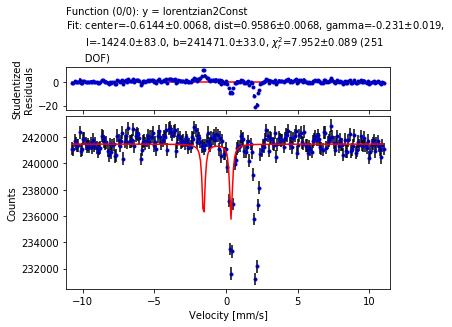

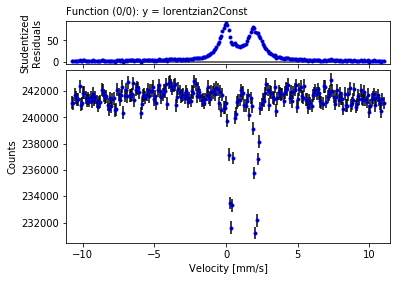

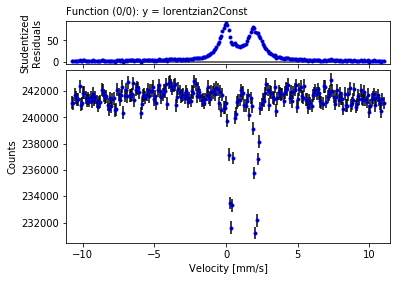

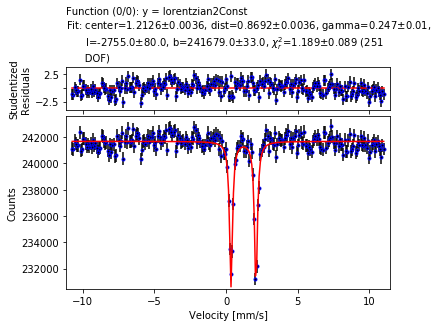


SETTINGS
  autoplot        True
  coarsen         [1]
  first_figure    0
  fpoints         [None]
  plot_all_data   [False]
  plot_bg         [True]
  plot_errors     [True]
  plot_fit        [True]
  plot_guess      [False]
  plot_guess_zoom [False]
  scale_eydata    [1.0]
  silent          False
  style_bg        [{'marker': '', 'color': 'k', 'ls': '-'}]
  style_data      [{'marker': '.', 'color': 'black', 'ls': '', 'mec': 'b'}]
  style_fit       [{'marker': '', 'color': 'r', 'ls': '-'}]
  style_guess     [{'marker': '', 'color': '0.25', 'ls': '-'}]
  subtract_bg     [False]
  xlabel          ['Velocity [mm/s]']
  xmax            [None]
  xmin            [None]
  xscale          ['linear']
  ylabel          ['Counts']
  ymax            [None]
  ymin            [None]
  yscale          ['linear']

GUESS (reduced chi^2 = 586.575 +/- 0.089, 251.0 DOF)
  center     = 1.0
  dist       = 1.0
  gamma      = 1.0
  I          = -10000.0
  b          = 240000.0

FIT RESULTS (reduced chi^2 = 

In [14]:
#loading ferrous Ammonia Sulphate data
data = np.loadtxt(".//data//FerrousAmmoniumSulphate_Jan24_full.Asc", skiprows=0)

data = np.transpose(data)
data[1][511] = (data[1][510] + data[1][0])/2
ydataerr = np.sqrt(data[1])

dataL = [data[0][0:256], data[1][0:256], ydataerr[0:256]]

y_fitter = s.data.fitter()
my_fitter.set(style_data = [{'marker': '.', 'color': 'black', 'ls': '', 'mec': 'b'}]\
              , plot_guess=False, fpoints=None, xlabel = "Velocity [mm/s]" , ylabel = "Counts")
# help(s.data.fitter)
guess = 'center=1.0, dist=1.0, gamma=1.0, I=-1e4, b=2.4e5'

my_fitter.set_functions(f=lorentzian2Const, p=guess)

my_fitter.set_data(xdata=velocities, ydata=dataL[1], eydata=dataL[2])
my_fitter.fit()
# print(my_fitter.get_fit_results())

# results = [getFits_lor(my_fitter, 0), getFits_lor(my_fitter, 1)]
